#   WEEK 3

## Part 3: Visualizations based on the book

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
# from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar
# import calplot
# import plotly.express as px
# import plotly.graph_objects as go
from urllib.request import urlopen
import json
import plotly.io as pio
from PIL import Image
import os
%matplotlib inline 

### Excercise Part 1: Connecting the dots and recreating plots from DAOST (Chapter 2) but using our own favorite dataset.

JITTER PLOT
> * Let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on *SF Police data*. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

In [2]:
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv') # load the csv data into pandas dataframe 
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']


In [3]:
# Choose crime month year 
months = ['January', 'February', 'March', 'April', 'May', 'June']
year = 2010
crime = 'ROBBERY'
time1 = "13:00"
time2 = "14:00"

jitter_data = df[(pd.to_datetime(df.Date).dt.year==year) & (pd.to_datetime(df.Date).dt.month_name().isin(months)) & (df.Category==crime) & ((df.Time>=time1) & (df.Time<time2))]

times = list(jitter_data.Time)
times.sort()

jitter_data.head()


,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
44379,10002590603021,100025906,3021,ROBBERY,ROBBERY OF A COMMERCIAL ESTABLISHMENT WITH A GUN,Thursday,01/07/2010,13:00,SOUTHERN,NONE,...,6.0,1.0,6.0,7.0,2.0,1.0,1.0,1.0,NaN,32.0
47128,10055988603084,100559886,3084,ROBBERY,CARJACKING WITH BODILY FORCE,Thursday,06/17/2010,13:30,BAYVIEW,COMPLAINANT REFUSES TO PROSECUTE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,86.0
139057,10053075103474,100530751,3474,ROBBERY,ATTEMPTED ROBBERY WITH BODILY FORCE,Tuesday,06/08/2010,13:45,MISSION,UNFOUNDED,...,14.0,3.0,14.0,NaN,2.0,NaN,NaN,3.0,NaN,53.0
159537,10013958503064,100139585,3064,ROBBERY,ROBBERY OF A BANK WITH BODILY FORCE,Thursday,02/11/2010,13:24,SOUTHERN,"ARREST, BOOKED",...,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,108.0
242042,10028083703463,100280837,3463,ROBBERY,ATTEMPTED ROBBERY OF A BANK WITH A DEADLY WEAPON,Thursday,03/25/2010,13:25,TENDERLOIN,NONE,...,12.0,NaN,12.0,5.0,2.0,NaN,NaN,NaN,NaN,19.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, '13:00'),
  Text(1, 0, '13:05'),
  Text(2, 0, '13:08'),
  Text(3, 0, '13:09'),
  Text(4, 0, '13:10'),
  Text(5, 0, '13:15'),
  Text(6, 0, '13:19'),
  Text(7, 0, '13:20'),
  Text(8, 0, '13:22'),
  Text(9, 0, '13:23'),
  Text(10, 0, '13:24'),
  Text(11, 0, '13:25'),
  Text(12, 0, '13:26'),
  Text(13, 0, '13:30'),
  Text(14, 0, '13:31'),
  Text(15, 0, '13:32'),
  Text(16, 0, '13:35'),
  Text(17, 0, '13:40'),
  Text(18, 0, '13:44'),
  Text(19, 0, '13:45'),
  Text(20, 0, '13:50'),
  Text(21, 0, '13:57')])

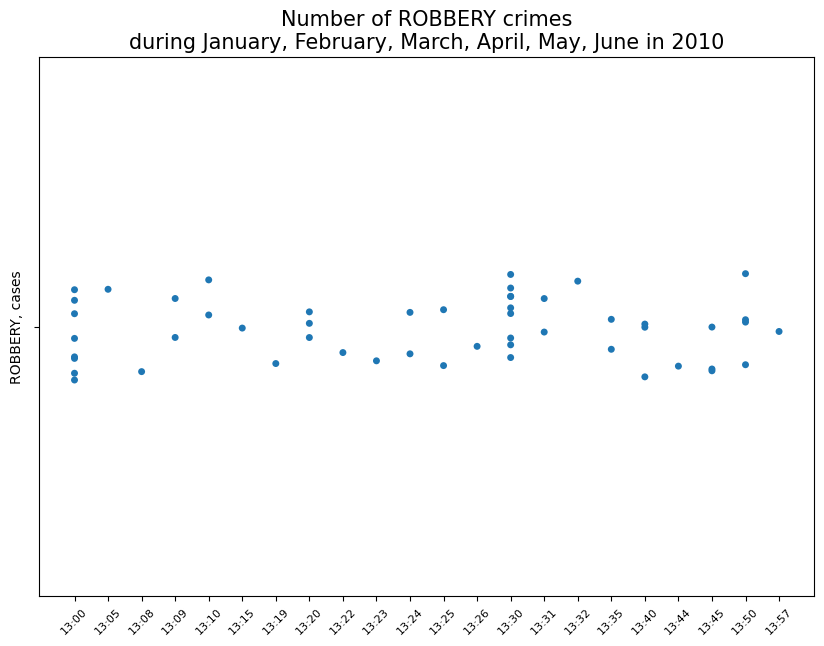

In [4]:
## JITTER PLOT
fig, ax = plt.subplots(1, figsize=(10,7))
# Plot
sns.stripplot(x=times, data=jitter_data, marker='o')

# title and labels
plt.title('Number of ' + crime + ' crimes\nduring ' + ', '.join(str(month) for month in months) + ' in ' + str(year), loc='center', fontsize=15)
plt.ylabel(''+crime+', cases')
plt.xticks(size= 8, rotation=45)

> * Last time, we did lots of bar-plots. Today, we'll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). I think the GPS data could be fun to see this way. 
>   * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
>   * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 

In [5]:
months = ["August", "September", "October", "November", "December"]
crime1 = 'DRUNKENNESS'
crime2 = 'VEHICLE THEFT'
year = 2010

histogram_data = df[((df.Category==crime1) | (df.Category==crime2)) 
                    & (pd.to_datetime(df.Date).dt.month_name().isin(months)) 
                    & (pd.to_datetime(df.Date).dt.year==year)]

drunk_lats = histogram_data[histogram_data.Category==crime1]["Y"]
veh_lats = histogram_data[histogram_data.Category==crime2]["Y"]

/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_5673/3858048113.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_5673/3858048113.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


[Text(37.7, 0, '37.70'),
 Text(37.72, 0, '37.72'),
 Text(37.739999999999995, 0, '37.74'),
 Text(37.76, 0, '37.76'),
 Text(37.78, 0, '37.78'),
 Text(37.8, 0, '37.80'),
 Text(37.82, 0, '37.82')]

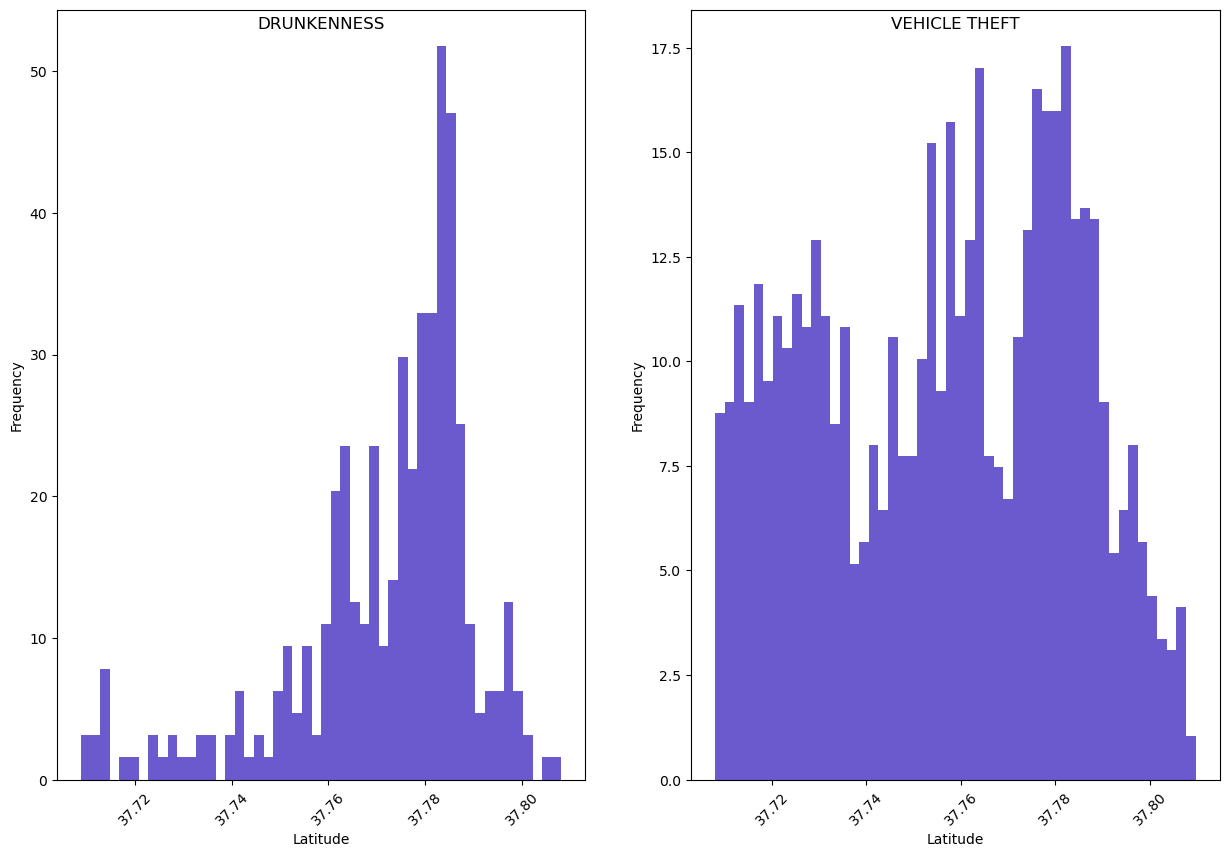

In [6]:
## HISTOGRAM PLOT
fig, ax = plt.subplots(1, 2, figsize=(15,10))

#subplot1
ax[0].hist(drunk_lats, bins=50, density=True, color='slateblue')
ax[0].set_title(crime1, y=1.0, pad=-14)
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("Latitude")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

#subplot2
ax[1].hist(veh_lats, bins=50, density=True, color='slateblue')
ax[1].set_title(crime2, y=1.0, pad=-14)
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("Latitude")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

> * Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. There is not a single great way to create kernel density plots in Python. [Here](https://www.geeksforgeeks.org/density-plots-with-pandas-in-python/), you'll finde a pandas based strategy, but you can also use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). There is also another nice tutorial for KDE plots [here](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0).

/Users/makey/anaconda3/envs/social/lib/python3.10/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'KDE plot of the minutes between 13:00 - 14:00 in the first 6 months of 2010')]

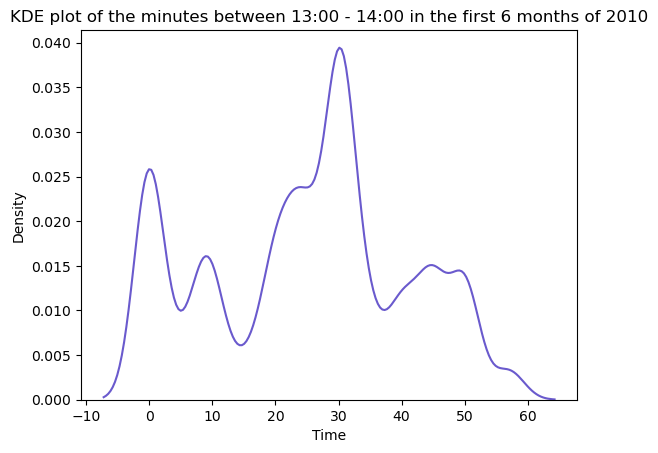

In [7]:
sns.kdeplot((pd.to_datetime(jitter_data.Time).dt.minute),bw=0.15, color='slateblue').set(title="KDE plot of the minutes between 13:00 - 14:00 in the first 6 months of 2010")

> * Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading? 

/Users/makey/anaconda3/envs/social/lib/python3.10/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'KDE plot of drunkeness and vehicle thieft crime made within different latitudes in January 2010')]

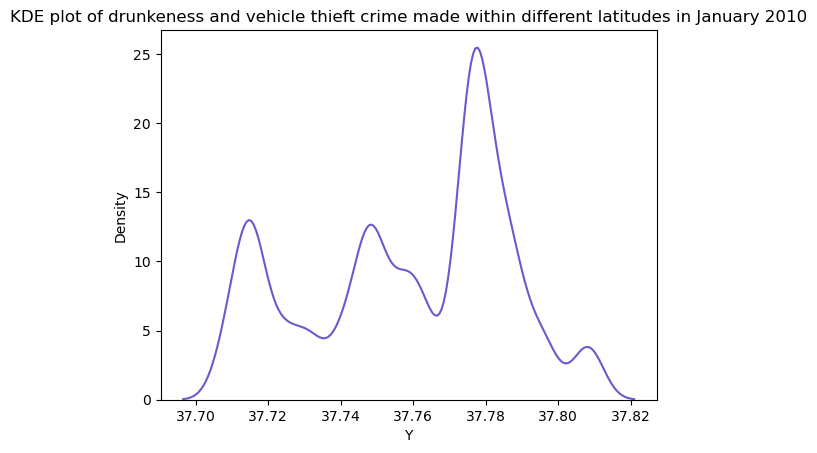

In [8]:
data_kde = histogram_data.sample(n = 25)
sns.kdeplot(data_kde['Y'], bw=0.15, color='slateblue').set(title='KDE plot of drunkeness and vehicle thieft crime made within different latitudes in January 2010')

> *Excercise Part 2*:
>
> * Now we'll work on creating two versions of the plot in **Figure 2-11**, but using the GPS data you used for your version of Figure 2-2. Comment on the result. It is not easy to create this plot from scracth.
>   * **Hint:** Take a look at the `scipy.stats.probplot` function. 

Text(0.5, 1.0, 'Probability plot of latitude distribution')

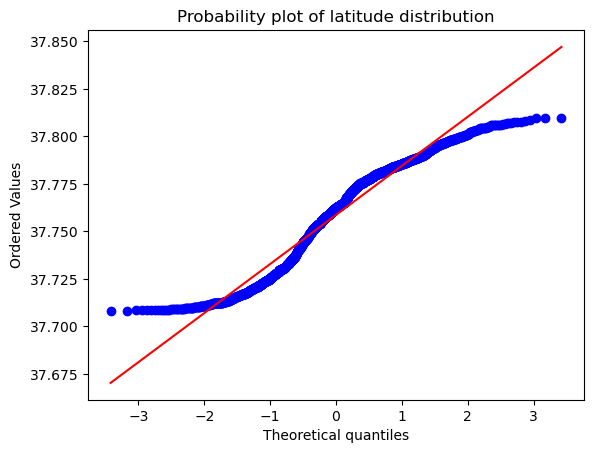

In [9]:
# from scipy import stats
# By default compares to normal distribution.

stats.probplot(histogram_data['Y'], plot=plt)
plt.title('Probability plot of latitude distribution')

> * OK, we're almost done, but we need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 15 focus crimes defined last week.
>   * For the full time-span of the data, calulate the **number of crimes per day** within each category for the entire duration of the data.
>   * Create a box-and whiskers plot showing the mean, median, quantiles, etc for all 15 crime-types side-by-side. There are many ways to do this. I like to use [matplotlibs's built in functionality](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html), but you can also achieve good results with [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html) or [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html).
>   * What does this plot reveal that you can't see in the plots from last time?


Text(0.5, 1.0, 'Boxplot distribution of daily crimes per category')

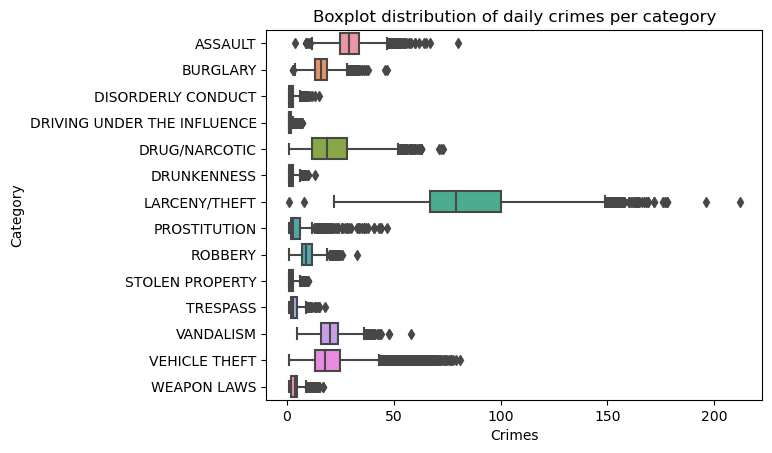

In [10]:
# Part 3 Exercise 2 Box Plots of crimes per category and date
box_plot_data = df[df.Category.isin(focuscrimes)]
box_plot_data = box_plot_data.groupby(['Category', 'Date'])['PdId'].count().reset_index(name='Crimes')
ax = sns.boxplot(y='Category', x='Crimes', data=box_plot_data)
ax.set_title('Boxplot distribution of daily crimes per category')

> * Also I want to show you guys another interesting use of box plots. To get started, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it. 
>   * For datapoint, the only thing you care about is the time-of-day, so discard everything else.
>   * You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. I can think of two ways to deal with this.
>     * For each time-of-day, simply encode it as seconds since midnight.
>     * Or keep each whole hour, and convert the minute/second count to a percentage of an hour. So 10:15 $\rightarrow$ 10.25, 8:40 $\rightarrow$ 8.67, etc.
> * Now you can create box-plots to create an overview of *when various crimes occur*. Note that these plot have quite a different interpretation than ones we created in the previous exercise. Cool, right?  

/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_5673/443995408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_plot_data2['sec_after_midnight'] = box_plot_data2.Time.apply(lambda x: int(x.split(':')[0]) * 3600 + int(x.split(":")[1]) * 60)


Text(0.5, 1.0, 'Boxplot distribution per category across time of day')

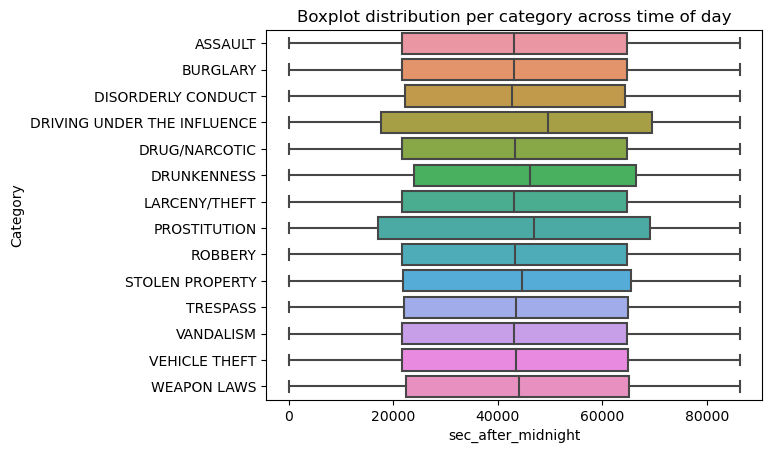

In [11]:
box_plot_data2 = df[df.Category.isin(focuscrimes)]
box_plot_data2['sec_after_midnight'] = box_plot_data2.Time.apply(lambda x: int(x.split(':')[0]) * 3600 + int(x.split(":")[1]) * 60)
box_plot_data2 = box_plot_data2.groupby(['Category', 'sec_after_midnight'])['PdId'].count().reset_index(name='Crines')
ax = sns.boxplot(y='Category', x='sec_after_midnight', data=box_plot_data2)
ax.set_title('Boxplot distribution per category across time of day')

## Part 4: Visualizing geodata with Plotly

So visualizing geodata used to be difficult, but with `Plotly` things have gotten easier. 

Like matplotlib, Plotly is an [open-source data visualization library](https://plotly.com/python/), but it's aimed at making interactive visualizations that can be rendered in a web browser (or jupyter notebook). You can read about it and learn how to install it [here](https://plotly.com/python/getting-started/).

That means that we can easily draw on the fact that the crime data has lots of exciting geo-data attached. The map we're going to be creating is called a **[choropleth map](https://en.wikipedia.org/wiki/Choropleth_map)** (more on these later), which is basically a map, where we color in shapefiles (more on this below) based on some value that we care about. We'll take our inspiration from Plotly's gentle intro to [Choropleth maps](https://plotly.com/python/mapbox-county-choropleth/)

The thing we want to look into is the SF police districts, shown below (image stolen from [this page](https://hoodline.com/2015/07/citywide-sfpd-redistricting-to-take-effect-sunday/)).

![districts from web](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/sfpdfinal.png)

But because we are cool programmers, we want to create our own maps, **with our own information on them**. Let's do it!

> *Exercise*: Let's plot a map with some random values in it.
>
> What we need to do to get going is to create some random data. Below is a little dictionary with a random value for each district that you can use if you want your plots to look like mine.

In [12]:
randomdata = {
    'CENTRAL': 0.8903601342256143,
    'SOUTHERN': 0.8642882941363439,
    'BAYVIEW': 0.925634097746596,
    'MISSION': 0.7369022697287458,
    'PARK': 0.9864113307070926,
    'RICHMOND': 0.5422239624697017,
    'INGLESIDE': 0.5754056712571605,
    'TARAVAL': 0.5834730737348696,
    'NORTHERN': 0.08148199528212985,
    'TENDERLOIN': 0.37014287986350447
}

In [13]:
randomdata = {'District': ['CENTRAL', 'SOUTHERN', 'BAYVIEW', 'MISSION', 'PARK', 'RICHMOND', 'INGLESIDE', 'TARAVAL', 'NORTHERN', 'TENDERLOIN'], 
              'Crime': [0.8903601342256143, 0.8642882941363439, 0.925634097746596, 0.7369022697287458, 0.9864113307070926, 0.5422239624697017, 0.5754056712571605, 0.5834730737348696, 0.08148199528212985, 0.37014287986350447]}

randomdata = pd.DataFrame.from_dict(randomdata)
randomdata

,District,Crime
0,CENTRAL,0.890360
1,SOUTHERN,0.864288
2,BAYVIEW,0.925634
3,MISSION,0.736902
4,PARK,0.986411
5,RICHMOND,0.542224
6,INGLESIDE,0.575406
7,TARAVAL,0.583473
8,NORTHERN,0.081482
9,TENDERLOIN,0.370143


> For this exercise, we'll use use the random values above and we'll also need some *shape-files*.
> [Shapefiles can have many different formats](https://en.wikipedia.org/wiki/Shapefile). Because we are brilliant teachers and an all-round standup people, we are sharing the shapefiles as [`geojson`](https://en.wikipedia.org/wiki/GeoJSON), which is an easy-to-use format for shapefiles based on `json`.
>
> * Download the SFPD District shapefiles **[here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson)**
> * Now that you have the shapefiles, you can follow the example here: https://plotly.com/python/mapbox-county-choropleth/ but with the following modifications:
>    * In the example the `id` is a so-called FIPS code. In our case the `id` is the `DISTRICT`
>    * You will have to convert the dictionary of random values I included above to a Pandas dataframe with the right column headings.
>    * The data used in the example has a range between zero and 12. Your data is between $[0,1]$. So you'll need to modify the plotting command to accound for that change.
>    * You should also change the map to display the right zoom level.
>    * And the map should center on San Francisco's `lat` and `lon`.
> * Now you can create your map.

Mine looks something like this.

![map_example.png](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/map_example.png)

You're encouraged to play around with other settings, color schemes, etc.

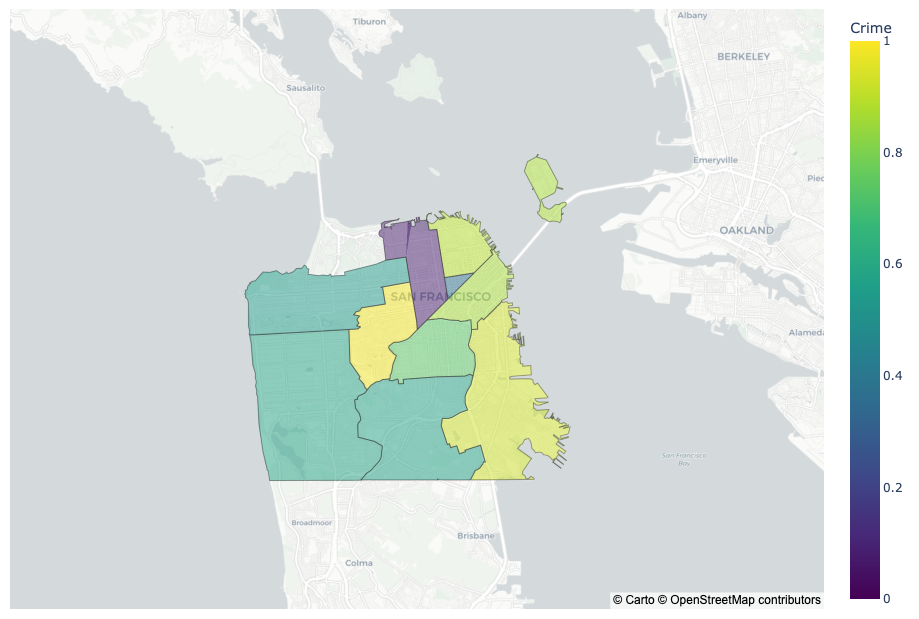

In [14]:
# # Import necessary libraries for fetching data and handling JSON files
# from urllib.request import urlopen
# import json

# Fetch the GeoJSON data from the URL and load it into a Python dictionary
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    counties = json.load(response)

# Inspect the first feature in the GeoJSON data (optional)
counties["features"][0]

# Create a choropleth map using Plotly Express
fig = px.choropleth_mapbox(randomdata, geojson=counties, locations='District', color='Crime',
                           color_continuous_scale="Viridis",
                           range_color=(0, 1),
                           mapbox_style="carto-positron",
                           zoom=10.5, center = {"lat": 37.773972, "lon": -122.431297},
                           opacity=0.5,
                           labels={'crime':'number of crimes'}
                          )

# Update the layout of the map to remove margins and set the figure size
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, width=900, height=600)

# Display the map
fig.show()

# Save the plot as an HTML file
filename = 'Tutorial_Choropleth_map.png'
img_bytes = pio.to_image(fig, format="png")
with open(filename, "wb") as f:
    f.write(img_bytes)

# Show polar chart static
Tutorial_Choropleth_map = Image.open(filename)
fig, ax = plt.subplots(figsize=(9, 6))
ax.imshow(Tutorial_Choropleth_map)
ax.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Delete png after plot
os.remove(filename)

> *Exercise:* But it's crime-data. Let's do something useful and **visualize where it is safest to leave your car on a Sunday**.
> 
> Take a moment to congratulate yourself. You now know how to create cool map plots!
> * Now, we can focus on our main goal: *determine the districts where you should (and should not) leave your car on Sundays*. (Or stated differently, count up the number of thefts.)
> * To do so, first:
>  * Filter the crime dataset by the `DayOfWeek` category and also choose the appropriate crime category.
>  * Aggregate data by police district.
> * To create the plot, remember that your range of data-values is different from before, so you'll have to change the plotly command a bit.
> * **Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?**
> * Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. *perceptual errors*):
>    * Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident? 
>    * Why do you think perceptual errors are a problem? Try to think of a few examples. You can have a look at this [article](https://www.businessinsider.com/fox-news-obamacare-chart-2014-3?r=US&IR=T) to get some inspiration.
> * *Try this for Extra credit:*
>     * Create plots for the same crime type, but different days, and comment on the results.

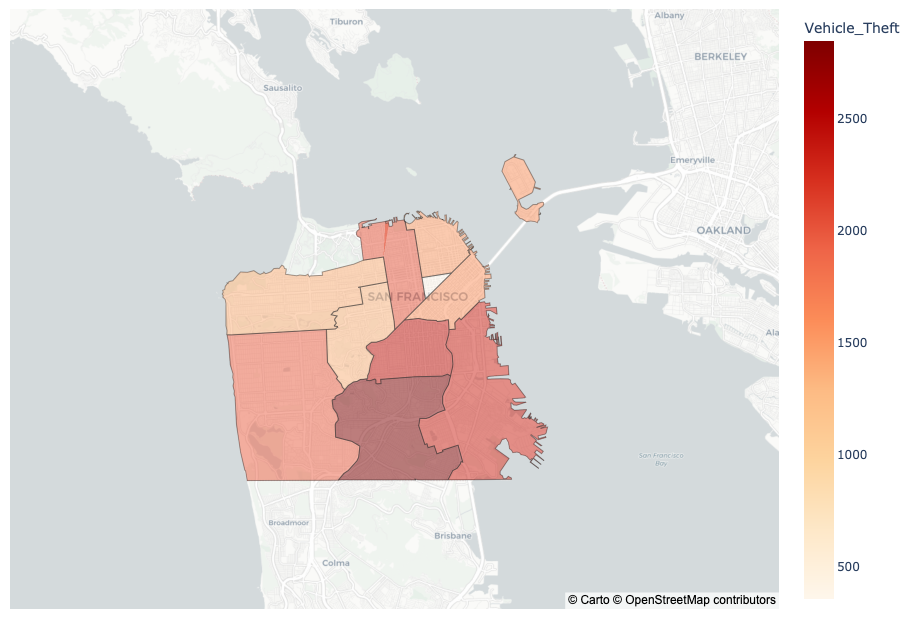

In [15]:
# Import necessary libraries for fetching data and handling JSON files
# from urllib.request import urlopen
# import json

# Filter the dataframe to only include rows with Category 'VEHICLE THEFT' on a Sunday
safe_car_data = df[(df.Category=='VEHICLE THEFT') & (pd.to_datetime(df.Date).dt.day_name()=='Sunday')]

# Group the filtered dataframe by Police Department district and count the number of Vehicle Theft incidents
safe_car_data = safe_car_data.groupby('PdDistrict')['PdId'].count().reset_index(name='Vehicle_Theft')

# Create a choropleth map using Plotly Express
fig = px.choropleth_mapbox(safe_car_data, geojson=counties, locations='PdDistrict', color='Vehicle_Theft',
                           color_continuous_scale="OrRd",
                           range_color=(safe_car_data.Vehicle_Theft.min(), safe_car_data.Vehicle_Theft.max()),
                           mapbox_style="carto-positron",
                           zoom=10.5, center = {"lat": 37.773972, "lon": -122.431297},
                           opacity=0.5,
                           labels={'Vehicle Theft':'number of crimes'}
                          )

# Update the layout of the map to remove margins and set the figure size
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, width=900, height=600)

# Display the map
fig.show()

# Save the plot as an HTML file
filename = 'Choropleth_map.png'
img_bytes = pio.to_image(fig, format="png")
with open(filename, "wb") as f:
    f.write(img_bytes)

# Show polar chart static
Choropleth_map = Image.open(filename)
fig, ax = plt.subplots(figsize=(9, 6))
ax.imshow(Choropleth_map)
ax.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Delete png after plot
os.remove(filename)
